In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dia = pd.DataFrame(
    np.array([
    [6, 17.6, 290.6, 89, 0.85],
    [6.5, 17.9063642213924, 290.906364221392, 90, 0.75],
    [7, 17.7092181761473, 290.709218176147, 89.4, 0.85],
    [7.5, 17.4431177993617, 290.443117799362, 90, 0.94],
    [8, 17.238476664467, 290.238476664467, 91, 1.1],
    [8.5, 17.111227628172, 290.111227628172, 90, 0.65],
    [9, 17.2051557297546, 290.205155729755, 89.67, 0.56],
    [9.5, 17.2440414224507, 290.244041422451, 88.4593910419677, 0.929376344086019],
    [10, 18.1188350968496, 291.11883509685, 86.1304150828853, 0.776731182795698],
    [10.5, 19.034033419855, 292.034033419855, 84.5246793338431, 0.947752688172041],
    [11, 20.0598816032821, 293.059881603282, 82.2505087486232, 0.938392473118277],
    [11.5, 20.5282895229643, 293.528289522964, 79.2963476393897, 1.15279032258064],
    [12, 21.5518535021973, 294.551853502197, 78.1937891713574, 1.43866666666666],
    [12.5, 21.6951922326552, 294.695192232655, 76.6500390293961, 1.65036559139785],
    [13, 21.4446167777925, 294.444616777793, 75.977509216461, 1.78222043010752],
    [13.5, 21.4946218774435, 294.494621877443, 75.1589065339886, 1.90746774193548],
    [14, 22.0966759648847, 295.096675964885, 74.1366769250874, 1.96587634408602],
    [14.5, 21.0625482075548, 294.062548207555, 73.6076956809488, 2.04939784946236],
    [15, 20.5570934331144, 293.557093433114, 74.0710451058253, 2.11417741935483],
    [15.5, 20.2805958725463, 293.280595872546, 74.9011473805615, 2.13592473118279],
    [16, 19.4521743525412, 292.452174352541, 76.6808354984345, 2.09709139784946],
    [16.5, 18.7791309343842, 291.779130934384, 78.2352998946514, 2.02119354838709],
    [17, 18.1965966659694, 291.196596665969, 80.8124220959692, 1.94945],
    [17.5, 17.6957314177615, 290.695731417762, 81.627903994785, 1.94843548387096],
    [18, 17, 290, 84.2293361471633, 1.84492473118279]]),
    columns=['hora', 'temp_aire', 'temp_abs', 'humedad_relativa', 'velocidad_viento'])
dia

hora  temp_aire    temp_abs  humedad_relativa  velocidad_viento
0    6.0  17.600000  290.600000         89.000000          0.850000
1    6.5  17.906364  290.906364         90.000000          0.750000
2    7.0  17.709218  290.709218         89.400000          0.850000
3    7.5  17.443118  290.443118         90.000000          0.940000
4    8.0  17.238477  290.238477         91.000000          1.100000
5    8.5  17.111228  290.111228         90.000000          0.650000
6    9.0  17.205156  290.205156         89.670000          0.560000
7    9.5  17.244041  290.244041         88.459391          0.929376
8   10.0  18.118835  291.118835         86.130415          0.776731
9   10.5  19.034033  292.034033         84.524679          0.947753
10  11.0  20.059882  293.059882         82.250509          0.938392
11  11.5  20.528290  293.528290         79.296348          1.152790
12  12.0  21.551854  294.551854         78.193789          1.438667
13  12.5  21.695192  294.695192         76.650039          1.650366
14  13.0  21.444617  294.444617         75.977509          1.782220
15  13.5  21.494622  294.494622         75.158907          1.907468
16  14.0  22.096676  295.096676         74.136677          1.965876
17  14.5  21.062548  294.062548         73.607696          2.049398
18  15.0  20.557093  293.557093         74.071045          2.114177
19  15.5  20.280596  293.280596         74.901147          2.135925
20  16.0  19.452174  292.452174         76.680835          2.097091
21  16.5  18.779131  291.779131         78.235300          2.021194
22  17.0  18.196597  291.196597         80.812422          1.949450
23  17.5  17.695731  290.695731         81.627904          1.948435
24  18.0  17.000000  290.000000         84.229336          1.844925

In [3]:
from uhi import Estacion
from uhi import secundarias as sec
from uhi import planta as plnt

estacion = Estacion(lon=99.11, lat=19.429)

In [4]:
outputs = [[np.nan for n in range(7)],]
for i in range(1, 25):
    hora = dia['hora'][i]
    temp_abs = dia['temp_abs'][i-1]
    temp_abs1 = temp_abs
    temp_abs0 = dia['temp_abs'][i]
    temp_aire = dia['temp_aire'][i]
    S = sec.S(temp_aire)
    hr = dia['humedad_relativa'][i]
    DPV = sec.DPV(sec.es(temp_aire), sec.e(sec.es(temp_aire), hr))
    velocidad_viento = dia['velocidad_viento'][i]
    Cp = sec.calor_especifico_aire()

    p = plnt.Planta()
    QE = p.QE(Cp, temp_aire, estacion.QN(hora, temp_abs), DPV, velocidad_viento)

    outputs.append([estacion.QN(hora, temp_abs),
                    estacion.delta_QS(hora=hora, temp_abs0=temp_abs0, temp_abs1=temp_abs1),
                    estacion.QUE(S, hora, temp_abs0, temp_abs1),
                    estacion.QHU(S, hora, temp_abs0, temp_abs1),
                    estacion.TD_PU(hora, S, temp_abs0, temp_abs1),
                    estacion.QHV(hora, temp_abs0, temp_abs1, QE),
                    estacion.TD_PV(hora, temp_abs0, temp_abs1, QE)])

outputs = pd.DataFrame(np.array(outputs),
                       columns=['QN', 'delta QS', 'QUE', 'QHU', 'TD_PU', 'QHV', 'TD_PV'])

In [5]:
dia.join(outputs)[1:]

hora  temp_aire    temp_abs  humedad_relativa  velocidad_viento  \
1    6.5  17.906364  290.906364         90.000000          0.750000   
2    7.0  17.709218  290.709218         89.400000          0.850000   
3    7.5  17.443118  290.443118         90.000000          0.940000   
4    8.0  17.238477  290.238477         91.000000          1.100000   
5    8.5  17.111228  290.111228         90.000000          0.650000   
6    9.0  17.205156  290.205156         89.670000          0.560000   
7    9.5  17.244041  290.244041         88.459391          0.929376   
8   10.0  18.118835  291.118835         86.130415          0.776731   
9   10.5  19.034033  292.034033         84.524679          0.947753   
10  11.0  20.059882  293.059882         82.250509          0.938392   
11  11.5  20.528290  293.528290         79.296348          1.152790   
12  12.0  21.551854  294.551854         78.193789          1.438667   
13  12.5  21.695192  294.695192         76.650039          1.650366   
14  13.0  21.444617  294.444617         75.977509          1.782220   
15  13.5  21.494622  294.494622         75.158907          1.907468   
16  14.0  22.096676  295.096676         74.136677          1.965876   
17  14.5  21.062548  294.062548         73.607696          2.049398   
18  15.0  20.557093  293.557093         74.071045          2.114177   
19  15.5  20.280596  293.280596         74.901147          2.135925   
20  16.0  19.452174  292.452174         76.680835          2.097091   
21  16.5  18.779131  291.779131         78.235300          2.021194   
22  17.0  18.196597  291.196597         80.812422          1.949450   
23  17.5  17.695731  290.695731         81.627904          1.948435   
24  18.0  17.000000  290.000000         84.229336          1.844925   

            QN    delta QS         QUE         QHU      TD_PU         QHV  \
1   -95.862241  -61.158982  -14.957485  -19.745774  16.825262    0.282548   
2   -75.614221  -44.728928  -12.938683  -17.946610  16.904965   -4.210461   
3   -37.367586  -20.459785   -4.583510  -12.324291  17.154034   -4.879919   
4    12.881985    5.352600   10.788260   -3.258875  17.555632    0.958038   
5    69.014640   30.061086   31.017221    7.936333  18.051580   11.689726   
6   126.084366   52.451158   52.947359   20.685849  18.616383   24.631774   
7   180.093980   71.360580   75.118491   33.614909  19.189140   40.071293   
8   228.377400   86.970818   90.002520   51.404062  19.977200   52.614382   
9   267.721200   97.445184  100.229065   70.046952  20.803080   65.642239   
10  297.294682  103.310668  105.151142   88.832872  21.635296   77.216664   
11  315.845268  103.920471  110.466696  101.458101  22.194594   89.275246   
12  323.386232  100.625857  107.463518  115.296856  22.807651   99.052538   
13  318.436506   91.552110  108.206430  118.677966  22.957434  109.098232   
14  302.694640   78.742348  108.853436  115.098857  22.798879  113.715757   
15  276.184423   62.580513  103.723201  109.880709  22.567715  116.238450   
16  239.148411   43.139353   91.609596  104.399461  22.324896  123.856331   
17  192.799780   19.642484   87.904736   85.252561  21.476688  108.013649   
18  141.592771   -3.219530   77.225317   67.586984  20.694103   92.033624   
19   85.829472  -26.491953   62.438821   49.882605  19.909799   75.932153   
20   29.349081  -48.551022   47.735237   30.164866  19.036304   59.905455   
21  -22.473538  -65.874321   30.496577   12.904207  18.271656   42.687581   
22  -64.757296  -76.446944   12.902530   -1.212883  17.646269   27.000126   
23  -91.354998  -77.662894   -2.404689  -11.287414  17.199968   10.617329   
24  -99.984164  -70.944581  -12.811219  -16.228365  16.981083   -1.215747   

        TD_PV  
1   17.712517  
2   17.513477  
3   17.483820  
4   17.742441  
5   18.217855  
6   18.791188  
7   19.475158  
8   20.030817  
9   20.607951  
10  21.120698  
11  21.654893  
12  22.088027  
13  22.533052  
14  22.737608  
15  22.849363  
16  23.186835  
17  22.485005  
18  21.777090 

<AxesSubplot:>

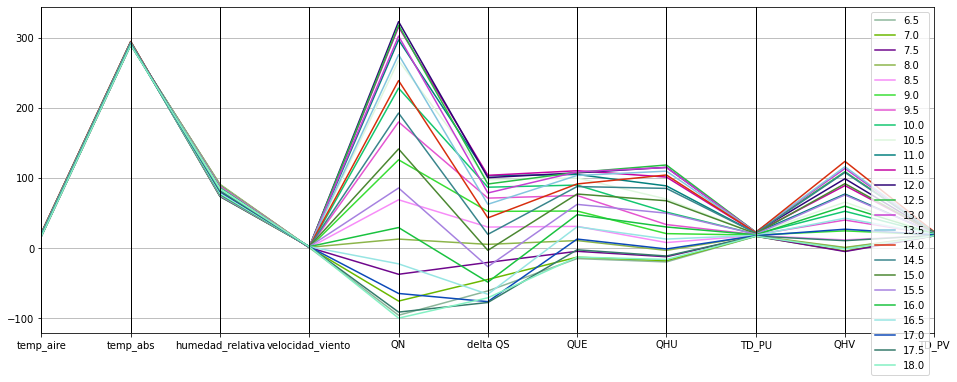

In [6]:
fig, ax = plt.subplots(figsize=(16, 6))
pd.plotting.parallel_coordinates(dia.join(outputs)[1:], 'hora')

In [10]:
fig = px.parallel_coordinates(dia.join(outputs)[1:], color='temp_abs')
fig.show()